In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import root_pandas
import pandas as pd
import uproot
import numpy as np
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

Welcome to JupyROOT 6.20/04


# Reading in the TPCTrackInfo

## tracklength in mm

## edep in MeV

## momentum in MeV

### Muons

In [9]:
motherpdg = 13
file = uproot.open("1000Muon_02to10GeV_seed11111.root")
tree = file["tree"]

# print all branches in tree
#print(tree.allkeys())

# get branch into numpy-like awardarray 
branch = tree["TPCSimHits.m_pdg"]
array = branch.array()

In [10]:
TPCMuonInfo = pd.DataFrame({subbranch: tree[f"TPCTrackInfos.{subbranch}"].array().content for subbranch in ["m_pdg", "m_trackid", "m_tracklength", "m_edep", "m_momentum"]})
TPCMuonInfo = TPCMuonInfo[(abs(TPCMuonInfo['m_pdg'])==motherpdg)]
TPCMuonInfo['m_dEdx'] = TPCMuonInfo['m_edep']*1000/(TPCMuonInfo['m_tracklength']/10)
TPCMuonInfo['m_dNdx'] = TPCMuonInfo['m_dEdx']/(26.174e-3)
TPCMuonInfo


,m_pdg,m_trackid,m_tracklength,m_edep,m_momentum,m_dEdx,m_dNdx
0,13,10,680.304200,0.146948,8708.359931,2.160041,82.526210
7,-13,9,711.631653,0.152236,7071.589210,2.139254,81.732036
23,13,8,677.749077,0.093633,527.104796,1.381527,52.782403
39,-13,7,704.558873,0.114358,420.179626,1.623109,62.012256
57,-13,6,666.920100,0.131005,5810.164913,1.964323,75.048636
...,...,...,...,...,...,...,...
14355,-13,5,688.332249,0.138139,8640.731200,2.006866,76.674018
14371,-13,4,712.379931,0.146420,8042.498421,2.055360,78.526795
14378,13,3,709.868044,0.148144,5441.829028,2.086921,79.732606
14394,-13,2,944.289735,0.178060,6721.633731,1.885649,72.042811


### Pions

In [18]:
motherpdg = 211
file = uproot.open("1000Pion_02to10GeV_seed11111.root")
tree = file["tree"]

# print all branches in tree
#print(tree.allkeys())

# get branch into numpy-like awardarray 
branch = tree["TPCSimHits.m_pdg"]
array = branch.array()

In [19]:
TPCPionInfo = pd.DataFrame({subbranch: tree[f"TPCTrackInfos.{subbranch}"].array().content for subbranch in ["m_pdg", "m_trackid", "m_tracklength", "m_edep", "m_momentum"]})
TPCPionInfo = TPCPionInfo[(abs(TPCPionInfo['m_pdg'])==motherpdg)]
TPCPionInfo['m_dEdx'] = TPCPionInfo['m_edep']*1000/(TPCPionInfo['m_tracklength']/10)
TPCPionInfo['m_dNdx'] = TPCPionInfo['m_dEdx']/(26.174e-3)
TPCPionInfo

,m_pdg,m_trackid,m_tracklength,m_edep,m_momentum,m_dEdx,m_dNdx
0,211,10,692.096776,0.146775,8709.815773,2.120723,81.024028
12,-211,9,722.282604,0.145897,7073.343393,2.019943,77.173644
27,211,8,686.793522,0.114375,532.956266,1.665353,63.626238
39,-211,7,716.734079,0.108661,421.323750,1.516063,57.922496
49,-211,6,676.955234,0.134982,5812.313325,1.993956,76.180779
...,...,...,...,...,...,...,...
31784,-211,5,698.729477,0.154632,8641.499109,2.213048,84.551368
31794,-211,4,722.923123,0.148765,8043.639287,2.057823,78.620876
31801,211,3,720.514343,0.150736,5443.598801,2.092058,79.928876
31809,-211,2,958.820616,0.202734,6723.233369,2.114409,80.782810


### Kaons

In [21]:
motherpdg = 321
file = uproot.open("1000Kaon_02to10GeV_seed11111.root")
tree = file["tree"]

# print all branches in tree
#print(tree.allkeys())

# get branch into numpy-like awardarray 
branch = tree["TPCSimHits.m_pdg"]
array = branch.array()

In [22]:
TPCKaonInfo = pd.DataFrame({subbranch: tree[f"TPCTrackInfos.{subbranch}"].array().content for subbranch in ["m_pdg", "m_trackid", "m_tracklength", "m_edep", "m_momentum"]})
TPCKaonInfo = TPCKaonInfo[(abs(TPCKaonInfo['m_pdg'])==motherpdg)]
TPCKaonInfo['m_dEdx'] = TPCKaonInfo['m_edep']*1000/(TPCKaonInfo['m_tracklength']/10)
TPCKaonInfo['m_dNdx'] = TPCKaonInfo['m_dEdx']/(26.174e-3)
TPCKaonInfo

,m_pdg,m_trackid,m_tracklength,m_edep,m_momentum,m_dEdx,m_dNdx
0,321,10,692.022395,0.120426,8709.851008,1.740199,66.485798
13,-321,9,722.130315,0.122660,7073.732337,1.698592,64.896157
19,321,8,686.121739,0.147459,531.701835,2.149162,82.110553
47,-321,7,718.215783,0.183003,418.360053,2.548019,97.349254
106,-321,6,676.780998,0.122891,5812.288257,1.815809,69.374534
...,...,...,...,...,...,...,...
42424,-321,5,698.542907,0.133472,8641.437681,1.910717,73.000583
42434,-321,4,723.133063,0.132315,8043.420112,1.829744,69.906935
42470,321,3,720.551321,0.122928,5443.301065,1.706024,65.180121
42483,-321,2,958.967768,0.193616,6723.621684,2.019009,77.137961


### Protons

In [9]:
motherpdg = 2212
file = uproot.open("5000_PDG"+str(motherpdg)+"_02to3GeV_seed11111.root")
tree = file["tree"]

# print all branches in tree
#print(tree.allkeys())

# get branch into numpy-like awardarray 
branch = tree["TPCSimHits.m_pdg"]
array = branch.array()

In [10]:
TPCProtonInfo = pd.DataFrame({subbranch: tree[f"TPCTrackInfos.{subbranch}"].array().content for subbranch in ["m_pdg", "m_trackid", "m_tracklength", "m_edep", "m_momentum"]})
TPCProtonInfo = TPCProtonInfo[(abs(TPCProtonInfo['m_pdg'])==motherpdg) & (TPCProtonInfo['m_momentum']>200)]
TPCProtonInfo['m_dEdx'] = TPCProtonInfo['m_edep']*1000/(TPCProtonInfo['m_tracklength']/10)
TPCProtonInfo

,m_pdg,m_trackid,m_tracklength,m_edep,m_momentum,m_dEdx
1,2212,17,777.090826,0.619373,345.446146,7.970410
151,2212,13,702.967411,0.186070,791.065499,2.646925
194,-2212,9,725.239320,0.111721,2162.591547,1.540472
205,2212,8,1101.302300,1.489463,255.784075,13.524559
418,-2212,7,1779.821302,3.766197,202.157380,21.160534
...,...,...,...,...,...,...
351803,-2212,5,647.330899,0.092663,2908.708101,1.431461
351809,2212,4,1117.592724,0.236243,1080.025858,2.113856
351852,-2212,3,778.689254,0.311250,551.515625,3.997103
351898,-2212,2,740.712354,0.126214,1879.244707,1.703957


### Electrons

In [16]:
motherpdg = 11
file = uproot.open("2000Electron_02to3GeV_seed11111.root")
tree = file["tree"]

# print all branches in tree
#print(tree.allkeys())

# get branch into numpy-like awardarray 
branch = tree["TPCSimHits.m_pdg"]
array = branch.array()

In [17]:
TPCElectronInfo = pd.DataFrame({subbranch: tree[f"TPCTrackInfos.{subbranch}"].array().content for subbranch in ["m_pdg", "m_trackid", "m_tracklength", "m_edep", "m_momentum"]})
TPCElectronInfo = TPCElectronInfo[(abs(TPCElectronInfo['m_pdg'])==motherpdg) & (TPCElectronInfo['m_momentum']>50)]
TPCElectronInfo['m_dEdx'] = TPCElectronInfo['m_edep']*1000/(TPCElectronInfo['m_tracklength']/10)
TPCElectronInfo['m_dNdx'] = TPCElectronInfo['m_dEdx']/(26.174e-3)
TPCElectronInfo

,m_pdg,m_trackid,m_tracklength,m_edep,m_momentum,m_dEdx,m_dNdx
0,11,10,693.800577,0.172367,2620.656396,2.484390,94.918248
9,-11,9,725.380430,0.169115,2161.739681,2.331402,89.073219
31,11,8,850.890989,0.211001,289.245955,2.479761,94.741383
32,11,6487,313.003538,0.065935,50.910093,2.106532,80.481858
55,-11,7,8613.442808,2.032599,262.238813,2.359798,90.158103
...,...,...,...,...,...,...,...
14490,-11,5,652.395480,0.155701,2839.912311,2.386607,91.182351
14497,11,4,718.284121,0.172790,927.946536,2.405588,91.907559
14506,-11,3,668.251442,0.184354,1236.280676,2.758753,105.400511
14517,11,2,916.487768,0.231363,2114.537628,2.524448,96.448675


# dE/dx Plot

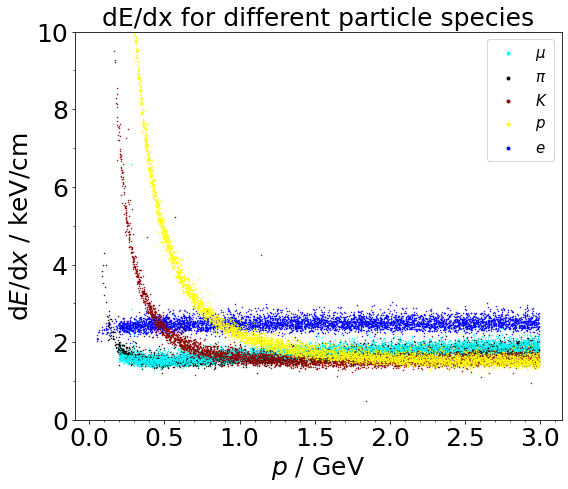

In [57]:
fig, ax = plt.subplots()

electrons = ax.scatter(TPCElectronInfo['m_momentum']/1000.0, TPCElectronInfo['m_dEdx'], marker='.', s = 1, color='blue',label=r'$e$')
pions = ax.scatter(TPCPionInfo['m_momentum']/1000.0, TPCPionInfo['m_dEdx'], marker='.', s = 1, color='black',label=r'$\pi$')
muons = ax.scatter(TPCMuonInfo['m_momentum']/1000.0, TPCMuonInfo['m_dEdx'], marker='.', s = 1, color='cyan',label=r'$\mu$')
kaons = ax.scatter(TPCKaonInfo['m_momentum']/1000.0, TPCKaonInfo['m_dEdx'], marker='.', s = 1, color='darkred',label=r'$K$')
protons = ax.scatter(TPCProtonInfo['m_momentum']/1000.0, TPCProtonInfo['m_dEdx'], marker='.', s = 1, color='yellow',label=r'$p$')

ax.set_xlabel('$p$ / GeV', fontsize=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
#plt.xscale('symlog')
ax.set_ylabel('d$E$/d$x$ / keV/cm', fontsize=25)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylim(0, 10)
#ax.set_aspect('equal')
ax.tick_params(labelsize=25)


#fig.set_size_inches(10, 6.18)
fig.set_size_inches(8, 6.9)
plt.title('dE/dx for different particle species', fontsize=25)
lgnd = plt.legend(handles=[muons, pions, kaons, protons, electrons],loc=1, prop={'size':15})
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]
lgnd.legendHandles[3]._sizes = [35]
lgnd.legendHandles[4]._sizes = [35]

fig.tight_layout()
plt.savefig('dEdxstudies.pdf')
plt.show()
plt.close()

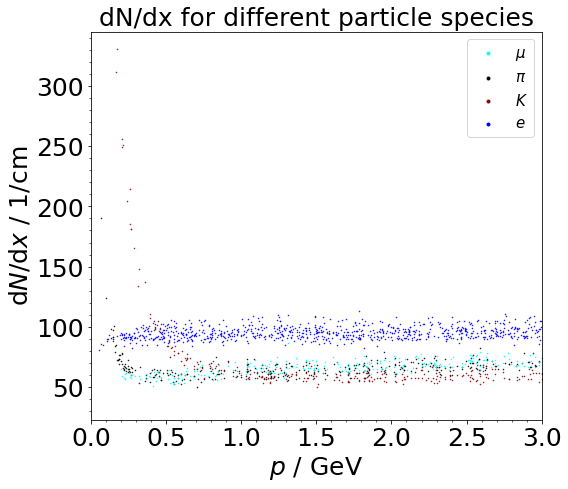

In [27]:
fig, ax = plt.subplots()

electrons = ax.scatter(TPCElectronInfo['m_momentum']/1000.0, TPCElectronInfo['m_dNdx'], marker='.', s = 1, color='blue',label=r'$e$')
pions = ax.scatter(TPCPionInfo['m_momentum']/1000.0, TPCPionInfo['m_dNdx'], marker='.', s = 1, color='black',label=r'$\pi$')
muons = ax.scatter(TPCMuonInfo['m_momentum']/1000.0, TPCMuonInfo['m_dNdx'], marker='.', s = 1, color='cyan',label=r'$\mu$')
kaons = ax.scatter(TPCKaonInfo['m_momentum']/1000.0, TPCKaonInfo['m_dNdx'], marker='.', s = 1, color='darkred',label=r'$K$')
#protons = ax.scatter(TPCProtonInfo['m_momentum']/1000.0, TPCProtonInfo['m_dNdx'], marker='.', s = 1, color='yellow',label=r'$p$')

ax.set_xlabel('$p$ / GeV', fontsize=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
#plt.xscale('symlog')
ax.set_ylabel('d$N$/d$x$ / 1/cm', fontsize=25)
ax.yaxis.set_major_locator(plt.MaxNLocator(8))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_xlim(0, 3)
#ax.set_aspect('equal')
ax.tick_params(labelsize=25)


#fig.set_size_inches(10, 6.18)
fig.set_size_inches(8, 6.9)
plt.title('dN/dx for different particle species', fontsize=25)
lgnd = plt.legend(handles=[muons, pions, kaons, electrons],loc=1, prop={'size':15})
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]
lgnd.legendHandles[3]._sizes = [35]
#lgnd.legendHandles[4]._sizes = [35]

fig.tight_layout()
plt.savefig('dNdxstudies.pdf')
plt.show()
plt.close()

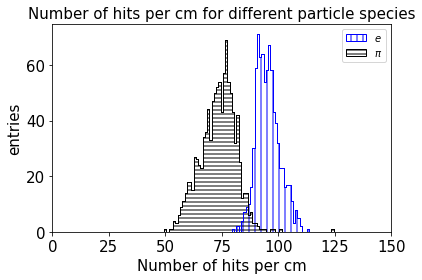

In [54]:
def plt_hist(axis, data, bins, color, hatch, label):
            counts, edges = np.histogram(data, bins=bins)
            edges = np.repeat(edges, 2)
            hist = np.hstack((0, np.repeat(counts, 2), 0))

            outline, = ax.plot(edges, hist, linewidth=1, color=color)
            axis.fill_between(edges, hist, 0,
                              edgecolor=outline.get_color(), hatch=hatch, label=label,
                              facecolor='none')  # < removes facecolor
            axis.set_ylim(0, None, auto=True)

fig, ax = plt.subplots()

labels = [r'$e$', r'$\pi$', r'$\mu$', r'$K$']
colors = ['blue', 'black', 'cyan', 'darkred']
bins = []
for i in range(150):
    bins.append(i - 0.5)

plt_hist(ax, TPCElectronInfo['m_dNdx'], bins, 'blue', r'||', r'$e$')
plt_hist(ax, TPCPionInfo['m_dNdx'], bins, 'black', '---', r'$\pi$')

ax.set_xlabel('Number of hits per cm', fontsize=15)

ax.set_ylabel('entries', fontsize=15)

ax.set_xlim(0, 150)
ax.tick_params(labelsize=15)


handles, labels = ax.get_legend_handles_labels()
lgnd = ax.legend(handles, labels)
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
#lgnd.legendHandles[2]._sizes = [35]
#lgnd.legendHandles[3]._sizes = [35]
#lgnd.legendHandles[4]._sizes = [35]
plt.title('Number of hits per cm for different particle species', fontsize=15)


fig.tight_layout()
#plt.savefig('dNdxstudies.pdf')
plt.show()
plt.close()

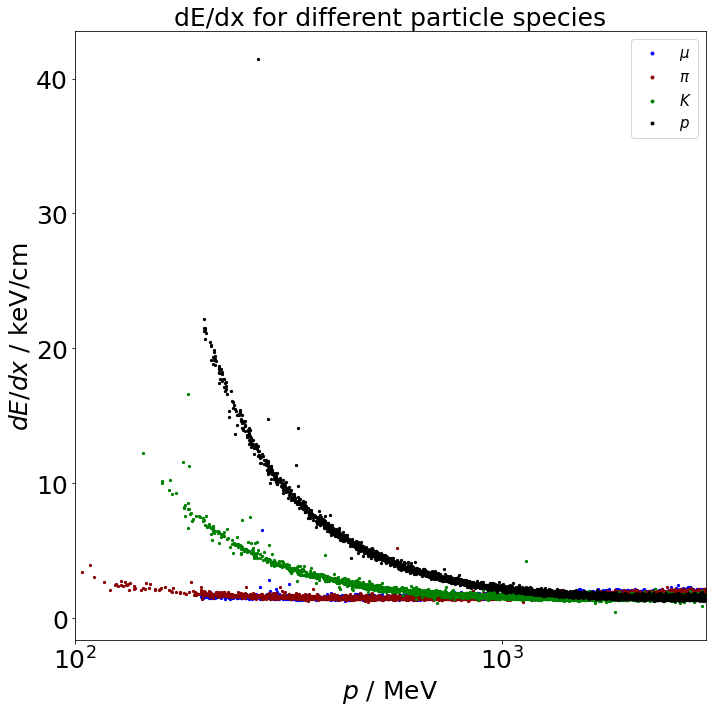

In [26]:
fig, ax = plt.subplots()

muons = ax.scatter(TPCMuonInfo['m_momentum'], TPCMuonInfo['m_dEdx'], marker='.', s = 20, color='blue',label=r'$\mu$')
pions = ax.scatter(TPCPionInfo['m_momentum'], TPCPionInfo['m_dEdx'], marker='.', s = 20, color='darkred',label=r'$\pi$')
kaons = ax.scatter(TPCKaonInfo['m_momentum'], TPCKaonInfo['m_dEdx'], marker='.', s = 20, color='green',label=r'$K$')
protons = ax.scatter(TPCProtonInfo['m_momentum'], TPCProtonInfo['m_dEdx'], marker='.', s = 20, color='black',label=r'$p$')

ax.set_xlabel('$p$ / MeV', fontsize=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.xscale('symlog')
ax.set_xlim(100,3000)
ax.set_ylabel('$dE/dx$ / keV/cm', fontsize=25)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
#ax.set_aspect('equal')
ax.tick_params(labelsize=25)


fig.set_size_inches(10, 10)
plt.title('dE/dx for different particle species', fontsize=25)
lgnd = plt.legend(handles=[muons, pions, kaons, protons],loc=1, prop={'size':15})
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]
lgnd.legendHandles[3]._sizes = [35]
fig.tight_layout()
#plt.savefig('dEdxstudies.pdf')
plt.show()
plt.close()

In [ ]:
fig, ax = plt.subplots()
x = ["Anode", "Kathode"]
yopen = [-18.76, -0.87]
yclosed = [-18.95, -1.14]
deltayopen = [0.04, 0.01]
deltayclosed = [0.06, 0.04]